In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from typing import Tuple
from glob import glob

In [69]:
def unzip(x):
    for a,b,c,d in x:
        return [a], [b], [c], [d]
        
class MetricHolder(object):
    def __init__(self, metric_name):
        self.metric_name = metric_name
        self.x = []
        self.avg = []
        self.high = []
        self.low = []
    def add(self, arg:Tuple):
        (epoch_n, avg, high, low) = arg
        self.x.append(epoch_n)
        self.avg.append(avg)
        self.high.append(high)
        self.low.append(low)
    def __call__(self):
        asc_order = sorted(zip(self.x, self.avg, self.high, self.low), key=lambda x: x[0])
        xs = []
        avgs = []
        highs = []
        lows = []
        for x, avg, high, low in asc_order:
            xs.append(x)
            avgs.append(avg)
            highs.append(high)
            lows.append(low)
        return xs, avgs, highs, lows

In [70]:
metrics = ["accuracy", "f1_score", "precision", "recall"]
class Graphable(object):
    def __init__(self, path, *, metrics=metrics):    
        self.metrics = {metric : MetricHolder(metric) for metric in metrics}
        self.path = path
    def append(self, metric_name, *, values):
        self.metrics[metric_name].add(values)
    def get(self, metric_name):
        return self.metrics[metric_name]()

In [71]:
def fold_variants(fold_no):
    dir = "./logs"
    variants = {
        "MDN Validation" : Graphable(f"{dir}/MDN_validation_*fold-{fold_no}.csv"),
        "MDN Train" : Graphable(f"{dir}/MDN_train_*fold-{fold_no}.csv"),
        
        "PRN Validation" : Graphable(f"{dir}/PRN_validation_*fold-{fold_no}.csv"),
        "PRN Train" : Graphable(f"{dir}/PRN_train_*fold-{fold_no}.csv")
    }
    return variants

In [72]:
def get_values(variants, metrics=metrics):
    for key, variant in variants.items():
        for file in glob(variant.path):
            df = pd.read_csv(file)
            for metric in metrics:
                x = int(file.split("_")[-2].split("-")[-1])
                avg = df[metric].mean()
                high = df[metric].max()
                low = df[metric].min()
                variant.append(metric, values=(x,avg,high,low))
                if key == "PRN Validation" and metric == "accuracy":
                    print(key,metric,x,avg,high,low)
    return variants

In [83]:
def plot_variant(graphable, *, metric, key):
    x, avg, high, low = graphable.get(metric)
    print(x,avg,high,low)
    if key == "PRN Train":
        plt.plot(x, avg, color='#9839B1', label=key)
        plt.fill_between(x, high, low, alpha=0.2, color='#15DB9D')
    elif key == "PRN Validation":
        plt.plot(x, avg, color='#C27CD5', label=key)
        plt.fill_between(x, high, low, alpha=0.2, color='#F18774')
    else:
        return
    plt.xlim((0, 100))
    plt.ylim((0, 1))
    plt.grid(True, color='white', linestyle='--', linewidth=1, alpha=0.5)

PRN Validation accuracy 148 0.7725465804811508 0.805908203125 0.716552734375
PRN Validation accuracy 19 0.005634610615079362 0.008544921875 0.00390625
PRN Validation accuracy 180 0.7580244760664682 0.7967529296875 0.6922607421875
PRN Validation accuracy 84 0.7620558965773809 0.79296875 0.7216796875
PRN Validation accuracy 163 0.7618307446676587 0.7962646484375 0.6875
PRN Validation accuracy 154 0.7676513671875 0.8023681640625 0.70068359375
PRN Validation accuracy 50 0.15311996217757937 0.1729166666666666 0.145751953125
PRN Validation accuracy 67 0.5203539651537699 0.535400390625 0.4981689453125
PRN Validation accuracy 3 0.006247674851190476 0.0113525390625 0.0045166015625
PRN Validation accuracy 101 0.7856414310515873 0.822998046875 0.7294921875
PRN Validation accuracy 136 0.7764020647321429 0.814697265625 0.7127685546875
PRN Validation accuracy 32 0.018187313988095238 0.021484375 0.0152587890625
PRN Validation accuracy 98 0.7837173704117064 0.820068359375 0.7264404296875
PRN Validatio

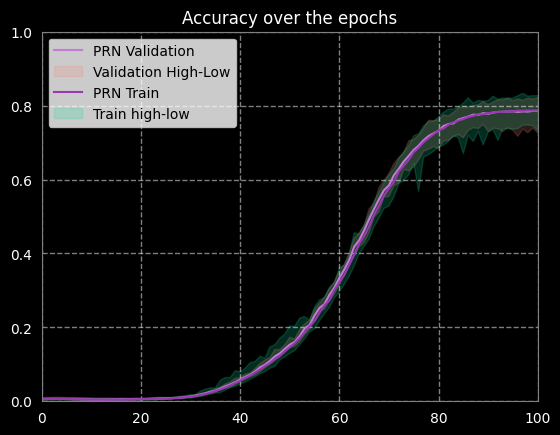

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.8258060241679823, 0.9182021635096698, 0.9537797537174016, 0.9693905917838925, 0.9750856334018329, 0.975630

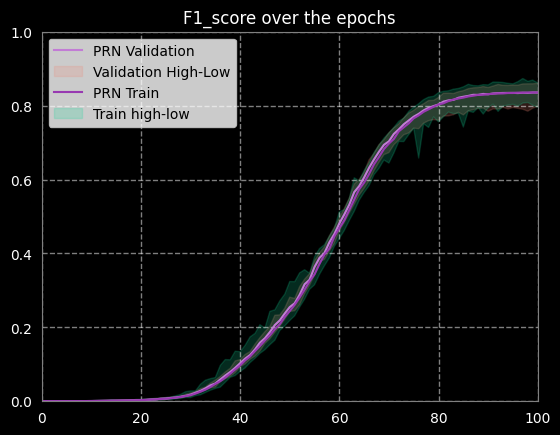

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.9909022954248247, 0.991401754142273, 0.991593898495748, 0.9916108740227563, 0.9916640991965929, 0.99172402

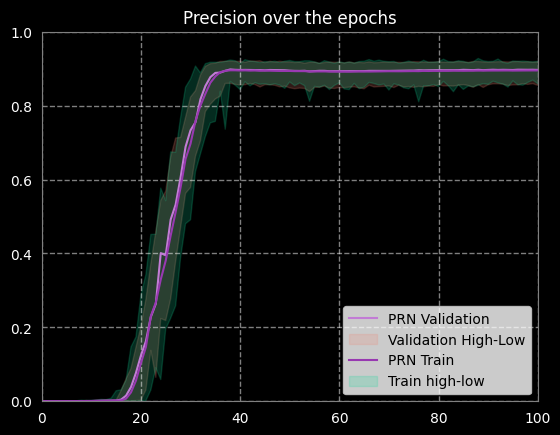

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.7139435298859127, 0.8567037915426587, 0.9193308996775794, 0.9484293619791667, 0.9592633928571429, 0.960257

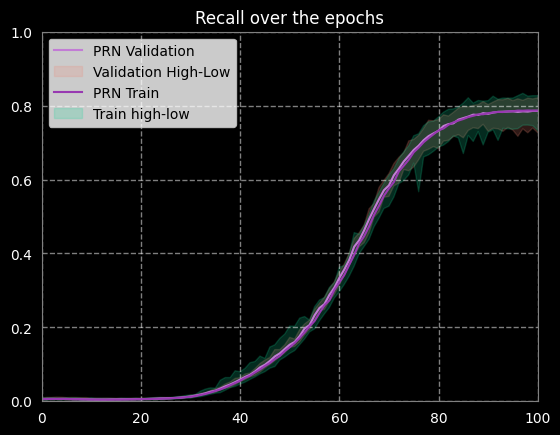

Fold 1 done
PRN Validation accuracy 89 0.7768616691468255 0.8050537109375 0.7457275390625
PRN Validation accuracy 14 0.004752216641865076 0.007080078125 0.002685546875
PRN Validation accuracy 23 0.006552269345238095 0.0089111328125 0.00439453125
PRN Validation accuracy 127 0.7823796347966271 0.8211669921875 0.7503662109375
PRN Validation accuracy 110 0.7886924138144842 0.822021484375 0.76123046875
PRN Validation accuracy 76 0.6871268136160714 0.7083740234375 0.6572265625
PRN Validation accuracy 41 0.06778932601686508 0.0760416666666666 0.0621337890625
PRN Validation accuracy 145 0.772164093501984 0.8160400390625 0.7437744140625
PRN Validation accuracy 172 0.7646290612599206 0.810791015625 0.7236328125
PRN Validation accuracy 95 0.7837503100198413 0.8270263671875 0.751708984375
PRN Validation accuracy 191 0.758697994171627 0.798095703125 0.7186279296875
PRN Validation accuracy 159 0.7719331287202381 0.811279296875 0.7376708984375
PRN Validation accuracy 148 0.7735049293154762 0.81579589

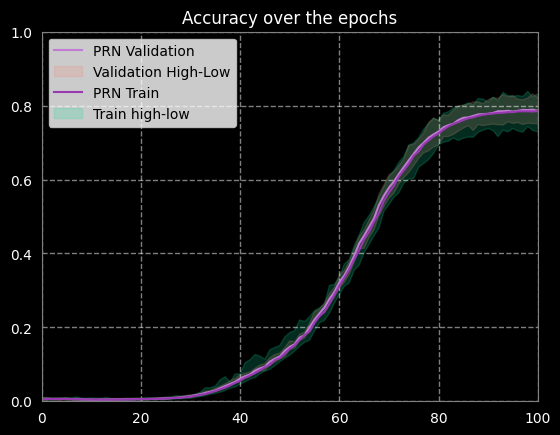

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.825255036324499, 0.9168665720061178, 0.9526517054036496, 0.9693625121303494, 0.9754700850340582, 0.9761349

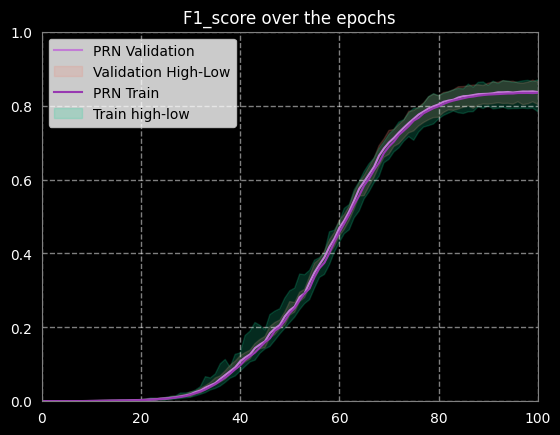

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.9908942409924099, 0.9914865934600433, 0.9914731585553714, 0.9916266259692964, 0.9916995772648425, 0.992018

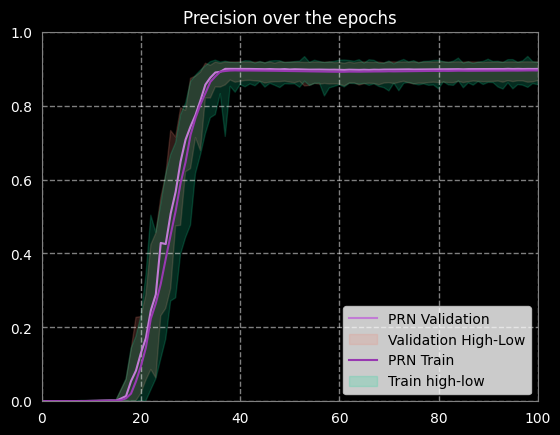

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.713092525421627, 0.8543433779761904, 0.9173510354662698, 0.9483487568204365, 0.9599609375, 0.9611142113095

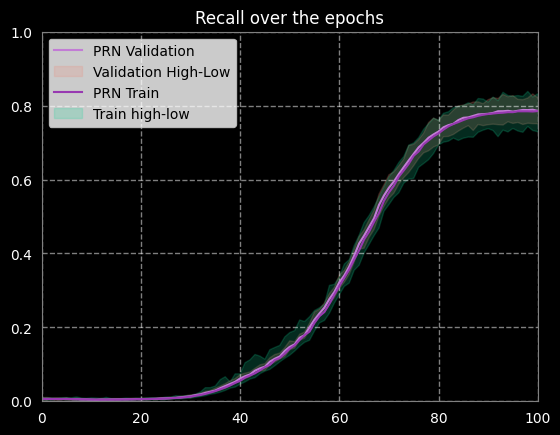

Fold 2 done
PRN Validation accuracy 159 0.6236173115079365 0.6651611328125 0.586181640625
PRN Validation accuracy 191 0.586334712921627 0.6158447265625 0.5478515625
PRN Validation accuracy 95 0.681314716641865 0.7078857421875 0.6517333984375
PRN Validation accuracy 172 0.611745101686508 0.63720703125 0.5799560546875
PRN Validation accuracy 145 0.6429327101934523 0.6705322265625 0.5986328125
PRN Validation accuracy 41 0.007110305059523809 0.009033203125 0.0050048828125
PRN Validation accuracy 76 0.007195560515873014 0.009521484375 0.0052490234375
PRN Validation accuracy 110 0.670698474702381 0.7052001953125 0.6282958984375
PRN Validation accuracy 127 0.6583651103670635 0.691162109375 0.6199951171875
PRN Validation accuracy 23 0.0076571025545634904 0.0108642578125 0.00537109375
PRN Validation accuracy 14 0.005697777157738095 0.007568359375 0.0035400390625
PRN Validation accuracy 89 0.6898235987103175 0.7362060546875 0.6436767578125
PRN Validation accuracy 98 0.6770829458085318 0.70959472

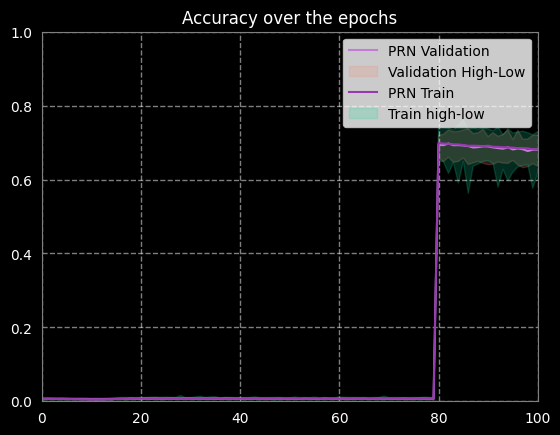

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.962670473234048, 0.97475658653984, 0.8570293376074423, 0.6256794021065746, 0.515404187734165, 0.4387751250

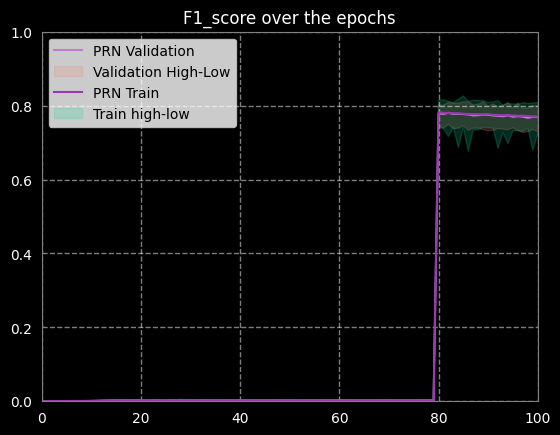

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.9904116373509169, 0.9907816630743799, 0.9965289272367954, 0.9963732587971857, 0.9964081234342995, 0.996471

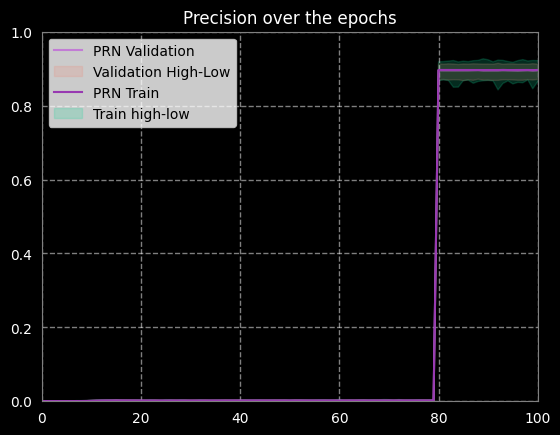

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199] [0.9368563213045634, 0.9595435732886906, 0.7578861297123016, 0.4724578373015873, 0.36557772197420635, 0.29911

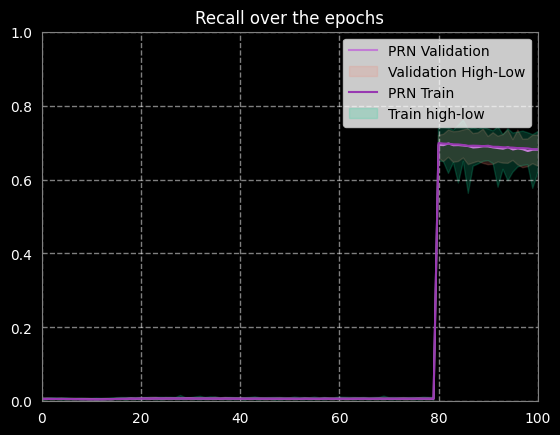

Fold 3 done


KeyboardInterrupt: 

In [84]:
folds = 10
for fold_no in range(1, folds+1):
    variants = fold_variants(fold_no)
    variants = get_values(variants)
    for metric in metrics:
        fig, ax = plt.subplots()
        ax.set_facecolor('#000000')
        fig.patch.set_facecolor('#000000')
        for key, variant in variants.items():
            plot_variant(variant, metric=metric, key=key)
        plt.title(f"{metric[0].upper() + metric[1:]} over the epochs", color='white')
        plt.legend(['PRN Validation', 'Validation High-Low', 'PRN Train', 'Train high-low'])
        plt.xticks(color='white')
        plt.yticks(color='white')
        ax.spines['bottom'].set_color('0.5')
        ax.spines['top'].set_color('0.5')
        ax.spines['right'].set_color('0.5')
        ax.spines['left'].set_color('0.5')
        plt.show()
        fig.savefig(f"./graphs/{metric}_fold_{fold_no}.png")
        plt.pause(0.1)
        plt.close()
    print("Fold", fold_no, "done")

In [75]:
plot_variant(variants["PRN Validation"], metric="f1_score")

TypeError: plot_variant() missing 1 required keyword-only argument: 'key'

In [ ]:
#########
# WRONG #
#########
"""
# plotting accuracy with respect to epochs with error bars
plt.figure()
# change the dimensions of the graph
plt.figure(figsize=(10, 5))
plt.errorbar(np.arange(1, len(train_accuracy_avg)+1), train_accuracy_avg, yerr=train_accuracy_std, fmt='-o', color='skyblue', ecolor='pink', elinewidth=1, capsize=0.5, markersize=2, linewidth=0.5, label="Train")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error bars\nplt.figure()\n# change the dimensions of the graph\nplt.figure(figsize=(10, 5))\nplt.errorbar(np.arange(1, len(train_accuracy_avg)+1), train_accuracy_avg, yerr=train_accuracy_std, fmt=\'-o\', color=\'skyblue\', ecolor=\'pink\', elinewidth=1, capsize=0.5, markersize=2, linewidth=0.5, label="Train")\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'

In [ ]:
"""
dir = "./logs"
files = os.listdir(dir)
for file in files:
    data = pd.read_csv(dir + "/" + file)
    accuracy_avg.append(np.mean(data["accuracy"].values))
    accuracy_std.append(np.std(data["accuracy"].values))

    f1_score_avg.append(np.mean(data["f1_score"].values))
    f1_score_std.append(np.std(data["f1_score"].values))
    
    precision_avg.append(np.mean(data["precision"].values))
    precision_std.append(np.std(data["precision"].values))
    
    recall_avg.append(np.mean(data["recall"].values))
    recall_std.append(np.std(data["recall"].values))
"""

'\ndir = "./logs"\nfiles = os.listdir(dir)\nfor file in files:\n    data = pd.read_csv(dir + "/" + file)\n    accuracy_avg.append(np.mean(data["accuracy"].values))\n    accuracy_std.append(np.std(data["accuracy"].values))\n\n    f1_score_avg.append(np.mean(data["f1_score"].values))\n    f1_score_std.append(np.std(data["f1_score"].values))\n    \n    precision_avg.append(np.mean(data["precision"].values))\n    precision_std.append(np.std(data["precision"].values))\n    \n    recall_avg.append(np.mean(data["recall"].values))\n    recall_std.append(np.std(data["recall"].values))\n'

In [ ]:
# print(len(files), len(accuracy_avg), len(f1_score_avg), len(precision_avg), len(recall_avg))

In [ ]:
"""
# plotting accuracy with respect to epochs with error bars
plt.figure()
plt.errorbar(np.arange(1, len(accuracy_avg)+1), accuracy_avg, yerr=accuracy_std, fmt='-o', color='skyblue', ecolor='pink', elinewidth=1, capsize=2)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error bars\nplt.figure()\nplt.errorbar(np.arange(1, len(accuracy_avg)+1), accuracy_avg, yerr=accuracy_std, fmt=\'-o\', color=\'skyblue\', ecolor=\'pink\', elinewidth=1, capsize=2)\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'

In [ ]:
"""
# plotting accuracy with respect to epochs with error fill
plt.figure()
plt.plot(np.arange(1, len(accuracy_avg)+1), accuracy_avg, '-o', color='skyblue')
plt.fill_between(np.arange(1, len(accuracy_avg)+1), [avg - std for avg, std in zip(accuracy_avg, accuracy_std)], [avg + std for avg, std in zip(accuracy_avg, accuracy_std)], color='pink', alpha=0.4)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
"""

'\n# plotting accuracy with respect to epochs with error fill\nplt.figure()\nplt.plot(np.arange(1, len(accuracy_avg)+1), accuracy_avg, \'-o\', color=\'skyblue\')\nplt.fill_between(np.arange(1, len(accuracy_avg)+1), [avg - std for avg, std in zip(accuracy_avg, accuracy_std)], [avg + std for avg, std in zip(accuracy_avg, accuracy_std)], color=\'pink\', alpha=0.4)\nplt.title("Accuracy vs Epochs")\nplt.xlabel("Epochs")\nplt.ylabel("Accuracy")\nplt.show()\n'